In [83]:
# general packages
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import os 
import json

# specific packages
from matplotlib.cm import ScalarMappable
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.lines import Line2D
from matplotlib.pyplot import xticks
from scipy.optimize import curve_fit
from polyfit import load_example, PolynomRegressor, Constraints
import matplotlib.ticker as tck
from sklearn.metrics import mean_squared_error
import matplotlib.lines as mlines


# set style
sns.set_style("white")

# set working directory
os.chdir("C:\\Users\\anr9744\\Projects\\Goo\\data")

In [3]:
# load data
with open(f"doublet_polyplot.json", 'r') as f:
    master_dict = json.load(f)

enum = list(range(len(master_dict["Distances"])))
times_tmp = master_dict['Times']
times = [[time / 1000000 for time in times_tmp[i]] for i in enum]
distances = master_dict['Distances']
frames = master_dict['Frames']

len(distances[0])

499

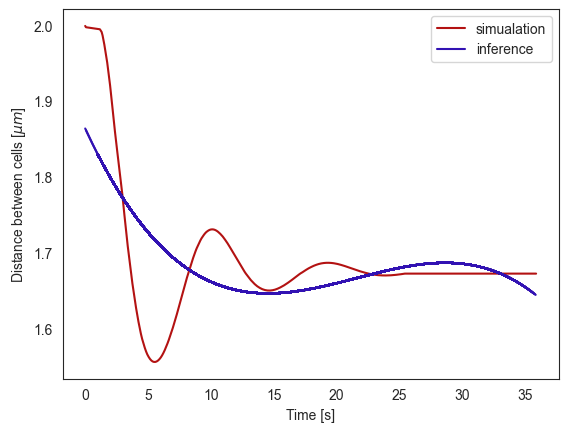

In [4]:
fig, ax = plt.subplots()

df = pd.DataFrame({'x': times[0],
                   'y': distances[0]})

# fit a polynomial curve on data
poly3 = np.poly1d(np.polyfit(df.x, df.y, deg = 3))
polyline = np.linspace(1, df.x[:-1], 500)


# compute colors
hsv2rgb = lambda hue: mcolors.hsv_to_rgb([hue,0.9,0.7])
hues = np.linspace(0, 0.7, len([0,1]))
colors = [hsv2rgb(hue) for hue in hues]

# plot
ax.plot(df.x, df.y, color=colors[0])
ax.plot(polyline, poly3(polyline), '-', color=colors[1])

# labels and legend
plt.ylabel(r'Distance between cells [$\mu m$]')
plt.xlabel(r'Time [s]')
#plt.legend(title = r'$falloff\_power = 0;   strength = -1000$')
plt.legend(['simualation', 'inference'])
ax.grid(False)
locs, labels = xticks()

# plot save to data foler
plt.savefig(f"doublet_fit.png", dpi=500)

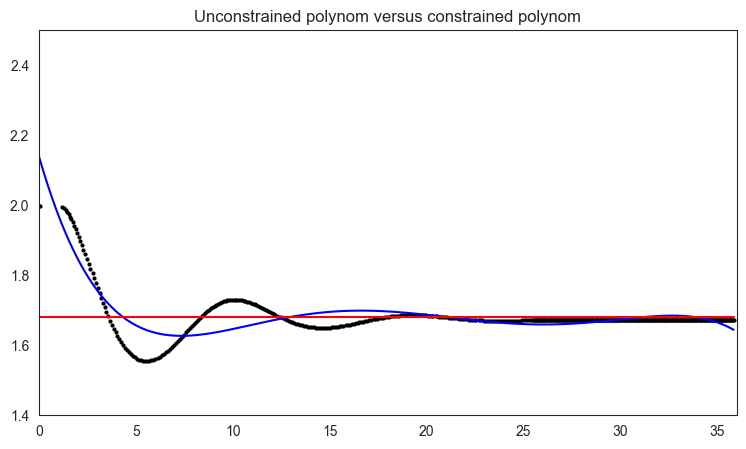

In [7]:
X, y = np.array(times[0]), np.array(distances[0])
x_plot = np.linspace(0, np.amax(X), 500)

X = X.reshape((-1,1))

DEG = 5

np_coeffs = np.polyfit(X.ravel(), y, DEG)
polyestimator = PolynomRegressor(deg=DEG)
vander = np.vander(x_plot, N = DEG +1)
pred_numpy = vander@np_coeffs

polyestimator = PolynomRegressor(deg=DEG)
monotone_constraint = Constraints(monotonicity='inc')
polyestimator.fit(X, y, loss = 'l2', constraints={0: monotone_constraint})
pred_mon = polyestimator.predict(x_plot.reshape(-1, 1))

f, ax = plt.subplots(1, figsize = (9, 5))
ax.set_xlim(0, 36)
ax.set_ylim(1.4, 2.5)
ax.set_title("Unconstrained polynom versus constrained polynom")
ax.scatter(X, y, c='k', s=4)

ax.plot(x_plot, pred_numpy, c='b', label='Degree=3 Unconstrained')
ax.plot(x_plot, pred_mon, c='r', label='Degree=3 Monotonic')

IndexError: list index out of range

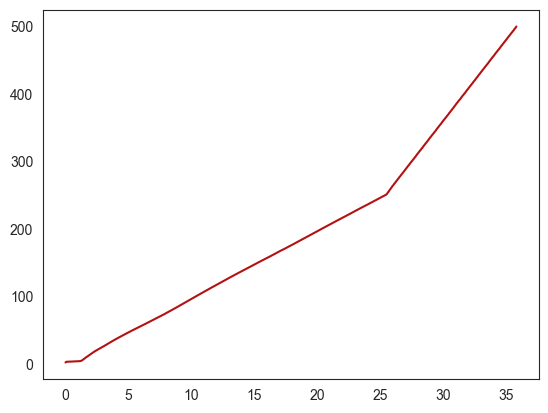

In [8]:
fig, ax = plt.subplots()

df = pd.DataFrame({'x': times[0],
                   'y': frames[0]})

# fit a polynomial curve on data
poly3 = np.poly1d(np.polyfit(df.x, df.y, deg = 10))
polyline = np.linspace(1, df.x[:-1], 500)


# compute colors
hsv2rgb = lambda hue: mcolors.hsv_to_rgb([hue,0.9,0.7])
hues = np.linspace(0, 0.7, len(enum))
colors = [hsv2rgb(hue) for hue in hues]

# plot
ax.plot(df.x, df.y, color=colors[0])
ax.plot(polyline, poly3(polyline), '--', color=colors[1])

# labels and legend
plt.ylabel(r'frames')
plt.xlabel(r'time [s]')
#plt.legend(title = r'$falloff\_power = 0;   strength = -1000$')
plt.legend(['simulation', 'inference'])
ax.grid(False)
locs, labels = xticks()

# plot save to data foler
#plt.savefig(f"doublet_fit.png", dpi=500)
#plt.plot(times[0], frames[0], "-")

A = 0.424762869999274
w = 0.6699785990110304
phi = -0.8305179147014226
c = 4.754169482728897
k = 1.6740356019796734


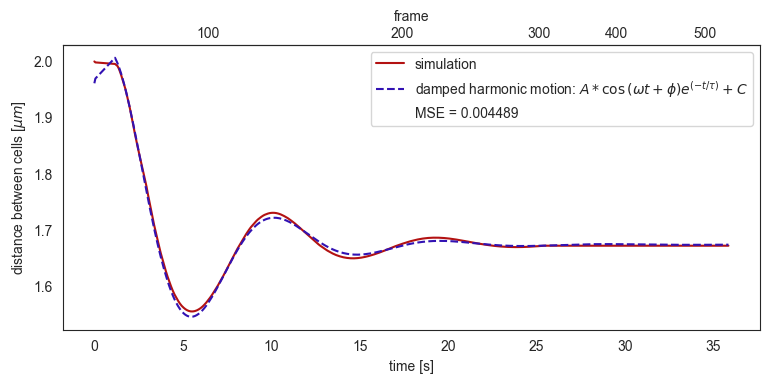

In [109]:
### mapping from time to frame
df = pd.DataFrame({'x': times[0], 'y': frames[0]})
# fit a polynomial curve on forward data
poly3_forward = np.poly1d(np.polyfit(df.x, df.y, deg = 5))
# fit a polynomial curve on reverse data
poly3_reverse = np.poly1d(np.polyfit(df.y, df.x, deg = 5))

### fitting hyperbola to simulation data
def polynomial(df, deg):
    # fit a polynomial curve on data
    poly3 = np.poly1d(np.polyfit(df.x, df.y, deg = deg))

    return poly3, polyline

def hyperbola(a, b, x):
    return a*0.3 / x + b*1.66

def damped_harmonic_motion(t, A, omega, phi, tau, C):
    return A * np.exp(-t/tau) * np.cos(omega*t + phi) + C

x, y = np.array(times[0]), np.array(distances[0])
t = np.linspace(1, x[:-1], 500)

# compute colors
hsv2rgb = lambda hue: mcolors.hsv_to_rgb([hue,0.9,0.7])
hues = np.linspace(0, 0.7, len([0,1]))
colors = [hsv2rgb(hue) for hue in hues]

# plot
f, ax1 = plt.subplots(1, figsize = (9, 3.7))

# Use the curve_fit function to fit the hyperbolic curve
popt, pcov = curve_fit(damped_harmonic_motion, x, y)

# Compute the root-mean-square error (RMSE)
y_fit = damped_harmonic_motion(x, *popt)
rmse = np.sqrt(np.mean((y - y_fit)**2))

# Print the fitted parameter values
print('A =', popt[0])
print('w =', popt[1])
print('phi =', popt[2])
print('c =', popt[3])
print('k =', popt[4])

ax1.plot(x, y, color = colors[0], label = 'simulation')
ax1.plot(x, damped_harmonic_motion(x, *popt), '--', color = colors[1], label =  r'damped harmonic motion: ${A} * \cos{{(\omega t + \phi)}} e^{{(-t/\tau)}} + C$')
# Create empty plot with blank marker containing the extra label
ax1.plot([], [], ' ', label=f'MSE = {rmse:.6f}')

# layout
plt.setp(ax1.get_xticklabels(), visible=True)
ax2 = ax1.secondary_xaxis('top', functions=(poly3_forward, poly3_reverse))
ax2.set_xlabel(r'frame')
#plt.setp(ax2.get_xticklabels(), visible=True)
ax2.tick_params(axis='both', which='both', length=0)

plt.ylabel(r'distance between cells [$\mu m$]')
plt.xlabel(r'time [s]')
#plt.legend(['simulation', r'${A} * \cos{{(\omega t + \phi)}} e^{{(-t/\tau)}} + C$'])
plt.legend()


plt.savefig(f"doublet_hyperbola.png", dpi=500)
plt.savefig(f"doublet_fit.png", dpi=500)
plt.show()